In [1]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd 
import os
from glob import glob
from matplotlib import image
from numpy import asarray
from PIL import Image

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
labels=pd.read_csv(os.path.join('./datasets/DogBreeds','labels.csv')  )

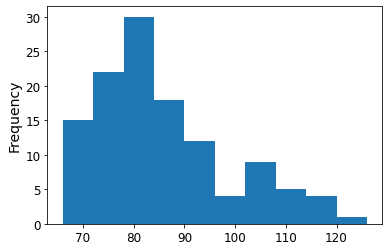

In [3]:
labels["breed"].value_counts().plot(kind="hist");

In [7]:
train_dir = './datasets/DogBreeds/train/'
test_dir  = './datasets/DogBreeds/test/'

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_ids, valid_ids = next(split.split(labels, labels["breed"]))
labels["is_valid"] = [i in valid_ids for i in range(len(labels))]

labels["id"] = labels["id"].apply(lambda x: x + ".jpg")

In [26]:
labels_train=labels[labels['is_valid']==False]
labels_val=labels[labels['is_valid']==True]

In [35]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator

train_images=np.array([img_to_array(load_img(os.path.join(train_dir,img), target_size=(100,100))) for img in labels_train['id'].values.tolist()])
val_images=np.array([img_to_array(load_img(os.path.join(train_dir,img), target_size=(100,100))) for img in labels_val['id'].values.tolist()])
train_images.shape

(8177, 100, 100, 3)

In [31]:
y_train=pd.get_dummies(labels_train['breed'])
y_val=pd.get_dummies(labels_val['breed'])

In [33]:
y_train.shape, y_val.shape

((8177, 120), (2045, 120))

In [38]:
model=keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(100,100,3)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(16,(3,3)))
model.add(tf.keras.layers.Activation('relu'))

# model.add(MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(8,(3,3)))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)       

In [39]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
model.fit(train_images,y_train,
         validation_data=(val_images,y_val),
         batch_size=32,
         epochs=75,
         verbose=2)

Epoch 1/75
256/256 - 33s - loss: 4.8827 - accuracy: 0.0126 - val_loss: 4.7768 - val_accuracy: 0.0171
Epoch 2/75
256/256 - 33s - loss: 4.7604 - accuracy: 0.0193 - val_loss: 4.7386 - val_accuracy: 0.0196
Epoch 3/75
256/256 - 33s - loss: 4.6938 - accuracy: 0.0204 - val_loss: 4.6966 - val_accuracy: 0.0240
Epoch 4/75
256/256 - 33s - loss: 4.6309 - accuracy: 0.0282 - val_loss: 4.6967 - val_accuracy: 0.0210
Epoch 5/75
256/256 - 33s - loss: 4.5431 - accuracy: 0.0362 - val_loss: 4.6967 - val_accuracy: 0.0215
Epoch 6/75
256/256 - 33s - loss: 4.4423 - accuracy: 0.0506 - val_loss: 4.7164 - val_accuracy: 0.0166
Epoch 7/75
256/256 - 33s - loss: 4.3233 - accuracy: 0.0638 - val_loss: 4.8008 - val_accuracy: 0.0225
Epoch 8/75
256/256 - 32s - loss: 4.1952 - accuracy: 0.0840 - val_loss: 4.7974 - val_accuracy: 0.0191
Epoch 9/75
256/256 - 33s - loss: 4.0640 - accuracy: 0.1042 - val_loss: 4.8186 - val_accuracy: 0.0210
Epoch 10/75
256/256 - 33s - loss: 3.9300 - accuracy: 0.1252 - val_loss: 4.8949 - val_accura

In [42]:
resNet = tf.keras.applications.ResNet50(weights = 'imagenet',
                        include_top = False,
                        input_shape = (100,100, 3))



resNet.trainable = False # Freeze layers
resNet_model =  keras.models.Sequential([
        resNet,
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(1024, activation = 'relu'),
         tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Dense(120, activation = 'softmax')])
     

optimizer = tf.keras.optimizers.Adam(1e-5)

resNet_model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

resnet_history = resNet_model.fit(train_images,y_train, batch_size=32,epochs=75,verbose=2,validation_data =(val_images, y_val))

Epoch 1/75
256/256 - 185s - loss: 5.4766 - accuracy: 0.0413 - val_loss: 4.4180 - val_accuracy: 0.0836
Epoch 2/75
256/256 - 181s - loss: 3.5559 - accuracy: 0.2044 - val_loss: 4.1359 - val_accuracy: 0.1276
Epoch 3/75
256/256 - 179s - loss: 2.5085 - accuracy: 0.4118 - val_loss: 4.0080 - val_accuracy: 0.1521
Epoch 4/75
256/256 - 182s - loss: 1.6734 - accuracy: 0.6260 - val_loss: 3.9376 - val_accuracy: 0.1628
Epoch 5/75
256/256 - 183s - loss: 1.0629 - accuracy: 0.8004 - val_loss: 3.9305 - val_accuracy: 0.1741
Epoch 6/75
256/256 - 188s - loss: 0.6604 - accuracy: 0.9067 - val_loss: 3.9382 - val_accuracy: 0.1814
Epoch 7/75
256/256 - 188s - loss: 0.4067 - accuracy: 0.9643 - val_loss: 3.9400 - val_accuracy: 0.1834
Epoch 8/75
256/256 - 187s - loss: 0.2553 - accuracy: 0.9864 - val_loss: 3.9444 - val_accuracy: 0.1897
Epoch 9/75
256/256 - 176s - loss: 0.1716 - accuracy: 0.9951 - val_loss: 3.9510 - val_accuracy: 0.1883
Epoch 10/75
256/256 - 173s - loss: 0.1154 - accuracy: 0.9987 - val_loss: 3.9663 - 

In [ ]:
#use early stopping.
#model better than ResNet